In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import time


In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [3]:
shelf_data_dir = "../data/product_detection_from_packshots/shelf_images"
shelf_images_path_list = [f"{shelf_data_dir}/{image_name}" for image_name in os.listdir(shelf_data_dir)]
sam_checkpoint = "../sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [4]:
data_dump_dir = "../data/product_detection_from_packshots/shelf_masks"
def save_mask():
    print(f"-----------------Started-----------------")
    counter = 1
    total = len(shelf_images_path_list)
    for image_path in shelf_images_path_list:
        start_time = time.time()
        mask_file_name = image_path.split("/")[-1].split(".")[0]
        segment_dir = f"{data_dump_dir}/{mask_file_name}"

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        masks = mask_generator.generate(image)
        c = 0
        os.makedirs(segment_dir, exist_ok=True)
        for mask in masks:
            seg_file_path = f"{segment_dir}/segmentation_{c}.npy"
            area_file_path = f"{segment_dir}/area_{c}.npy"
            bbox_file_path = f"{segment_dir}/bbox_{c}.npy"
            predicted_iou_file_path = f"{segment_dir}/predicted_iou_{c}.npy"
            point_coords_file_path = f"{segment_dir}/point_coords_{c}.npy"
            stability_score_file_path = f"{segment_dir}/stability_score_{c}.npy"
            crop_box_file_path = f"{segment_dir}/crop_box_{c}.npy"

            np_segmentation = mask["segmentation"]
            np_area = mask["area"]
            np_bbox = mask["bbox"]
            np_predicted_iou = mask["predicted_iou"]
            np_point_coords = mask["point_coords"]
            np_stability_score = mask["stability_score"]
            np_crop_box = mask["crop_box"]

            np.save(seg_file_path, np_segmentation)
            np.save(area_file_path, np_area)
            np.save(bbox_file_path, np_bbox)
            np.save(predicted_iou_file_path, np_predicted_iou)
            np.save(point_coords_file_path, np_point_coords)
            np.save(stability_score_file_path, np_stability_score)
            np.save(crop_box_file_path, np_crop_box)
            c+=1

        end_time = time.time()
        print(f"Processed: [{counter}/{total}] {mask_file_name} | Time: {end_time-start_time}")
        counter+=1
        


save_mask()

-----------------Started-----------------
Processed: [1/3153] db1 | Time: 8.951188564300537
Processed: [2/3153] db10 | Time: 4.724142551422119
Processed: [3/3153] db100 | Time: 4.398322820663452
Processed: [4/3153] db1000 | Time: 4.470287561416626
Processed: [5/3153] db1001 | Time: 4.4680869579315186
Processed: [6/3153] db1002 | Time: 4.795135736465454
Processed: [7/3153] db1003 | Time: 4.734611749649048
Processed: [8/3153] db1004 | Time: 4.57080078125
Processed: [9/3153] db1005 | Time: 4.607855319976807
Processed: [10/3153] db1006 | Time: 4.516358852386475
Processed: [11/3153] db1007 | Time: 4.426000118255615
Processed: [12/3153] db1008 | Time: 4.7783215045928955
Processed: [13/3153] db1009 | Time: 4.607999324798584
Processed: [14/3153] db101 | Time: 4.1590001583099365
Processed: [15/3153] db1010 | Time: 4.208998918533325
Processed: [16/3153] db1011 | Time: 4.426001071929932
Processed: [17/3153] db1012 | Time: 4.526463270187378
Processed: [18/3153] db1013 | Time: 4.479999303817749
Pro

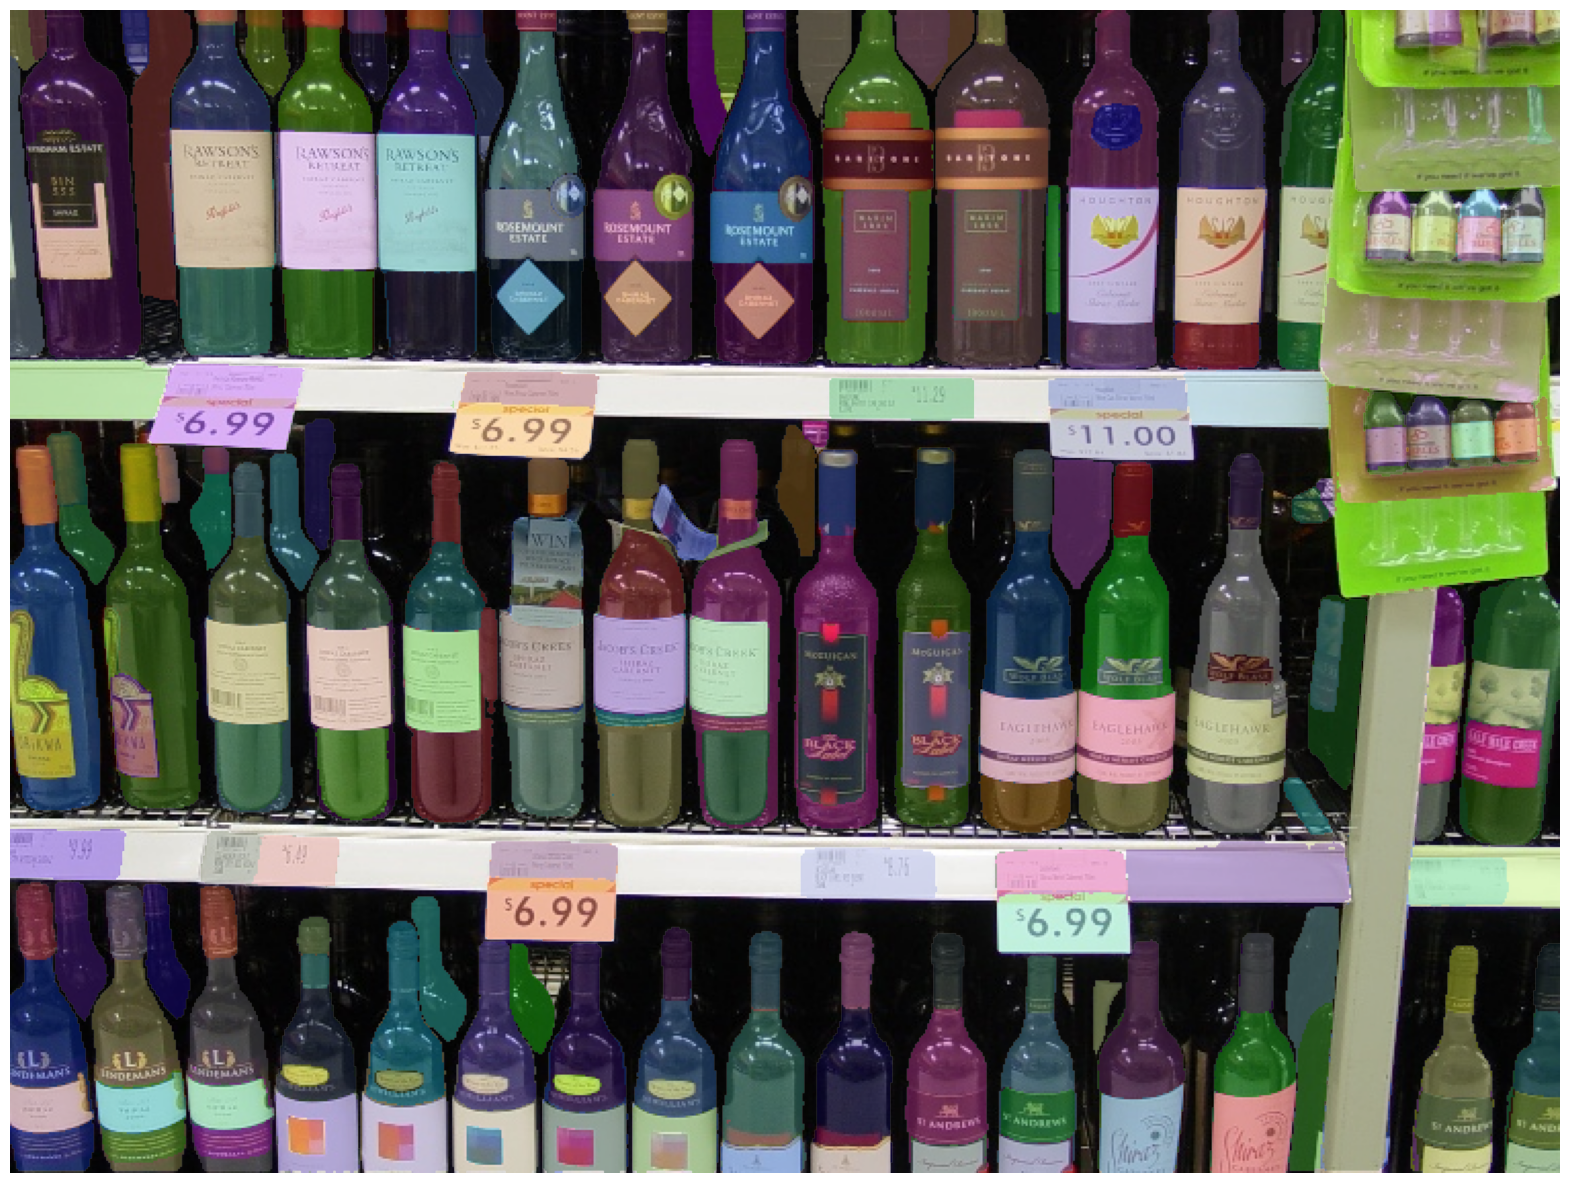

In [7]:
def show_saved_maskes(name="db999"):
    dir = f"../data/product_detection_from_packshots/shelf_masks/{name}"
    n = len(os.listdir(dir))//7
    masks_list = []
    image_path = f"../data/product_detection_from_packshots/shelf_images/{name}.jpg"
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for num in range(0, n):
        np_segmentation = np.load(f"{dir}/segmentation_{num}.npy")
        np_area = np.load(f"{dir}/area_{num}.npy")
        np_bbox = np.load(f"{dir}/bbox_{num}.npy")
        np_predicted_iou = np.load(f"{dir}/predicted_iou_{num}.npy")
        np_point_coords = np.load(f"{dir}/point_coords_{num}.npy")
        np_stability_score = np.load(f"{dir}/stability_score_{num}.npy")
        np_crop_box = np.load(f"{dir}/crop_box_{num}.npy")
        masks_list.append({
          'segmentation': np_segmentation,
          'area':np_area, 
          'bbox':np_bbox, 
          'predicted_iou':np_predicted_iou, 
          'point_coords':np_point_coords, 
          'stability_score':np_stability_score, 
          'crop_box':np_crop_box
        })

    plt.figure(figsize=(20,20))
    plt.imshow(image)
    show_anns(masks_list)
    plt.axis('off')
    plt.show()
show_saved_maskes(name="db932")